# Определение перспективного тарифа для телеком компании

### <font color=red>Краткий план работ:
______________________________________________________
    
Шаг 1. Открыть файл с данными и изучить общую информацию;
    
Шаг 2. Подготовить данные;
    
Шаг 3. Проанализировать данные;
    
Шаг 4. Проверить гипотезы;
    
Шаг 5. Написать общий вывод.

_______________________________________________________
Описания данных:
    
 1. Таблица users (информация о пользователях):
    
user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана
_____________________________________________________________

 2. Таблица calls (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок
_______________________________________________________
    
 3. Таблица messages (информация о сообщениях):
    
id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение
________________________________________________________

 4. Таблица internet (информация об интернет-сессиях):
    
id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя
________________________________________________________
    
 5. Таблица tariffs (информация о тарифах):
    
tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
____________________________________________________________

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#Импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

#Добавляем таблицы и даём им правильный нейминг
data_calls = pd.read_csv("/datasets/calls.csv")
data_internet = pd.read_csv("/datasets/internet.csv")
data_message = pd.read_csv("/datasets/messages.csv")
data_tariffs = pd.read_csv("/datasets/tariffs.csv")
data_users = pd.read_csv("/datasets/users.csv")

#Рассмотрим таблицы методом info()
#print(data_users.info())
print(data_calls.info())
#print(data_message.info())
#print(data_internet.info())
#print(data_tariffs.info())


#Рассмотрим таблицы методом describe(), чтобы изучить значения внутри таблицы
#print(data_users.describe())
#print(data_calls.describe())
#print(data_message.describe())
#print(data_internet.describe())
#print(data_tariffs.describe())


#Рассмотрим таблицы методом head()
#print(data_users.head())
#print(data_calls.head())
#print(data_message.head())
#print(data_internet.head())
#print(data_tariffs.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


## Шаг 2. Подготовьте данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193882 entries, 0 to 202605
Data columns (total 4 columns):
id           193882 non-null object
call_date    193882 non-null object
duration     193882 non-null float64
user_id      193882 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.4+ MB


0.9569363348749056

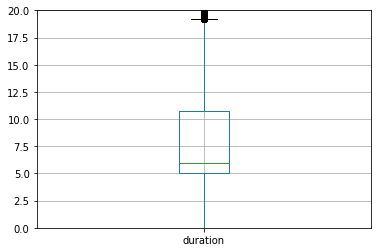

In [2]:

#data_calls.info()
#Знаю что неверное решение, ниже есть вопрос по этому пункту
#upd использовал медианные значения
duration_calls = data_calls['duration'].median()
data_calls.loc[data_calls['duration'] == 0, 'duration'] = duration_calls


#Найдем аномальные значения и удалим их из таблицы
#Построим диаграмму размаха (boxplot) для оценки минут разговора
plt.ylim(0, 20)
data_calls.boxplot('duration')
#Из диаграммы можно сделать вывод, что основная масса значений лежит в интревале до 18 минут.
#Удалим значения
data_calls_clear = data_calls.loc[(data_calls['duration'] <= 18)]
#Приведем данные к нужным типам
#data_internet['mb_used'] = data_internet['mb_used'].astype(int)
#data_calls['duration'] = data_calls['duration'].astype(int)
np.ceil(data_calls['duration'])
np.ceil(data_internet['mb_used'])
data_calls_clear.info()
#Вычислим процент отброшенных данных
percentage_data_cleared =  data_calls_clear['duration'].count() / data_calls['duration'].count()
percentage_data_cleared

<font color=blue><<Первая правка>>
________________________________________________
    
Привел столбцы с длительностью звонка и использованного интернета к значениям int

In [3]:
#Определим количество пропущенных значений в таблицах
data_users.isna().sum()
#столбец churn_date - 462

data_calls.isna().sum()
#пропущенные значения отсутствуют

data_message.isna().sum()
#пропущенные значения отсутствуют

data_internet.isna().sum()
#пропущенные значения отсутствуют

data_tariffs.isna().sum()
#пропущенные значения отсутствуют

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [4]:
#Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
data_calls_clear['call_date'] = pd.to_datetime(data_calls_clear['call_date'], format='%Y-%m-%d')
#Выделим месяца в отдельный столбец от call_date
data_calls_clear['month'] = data_calls_clear['call_date'].dt.month
#переименуем столбец tariff на tariff_name
data_users.rename(columns={'tariff': 'tariff_name'}, inplace=True)

#Создадим новую таблицу объеденением двух методом merge()
user_calls = data_users[['user_id', 'tariff_name', 'city']].merge(data_calls_clear[['user_id', 'month', 'duration']])
#Создаем новую таблицу методом pivot_table()
user_calls_count = user_calls.pivot_table(index=['user_id', 'month', 'tariff_name', 'city'], values='duration',aggfunc=['sum', 'count'])
#Заменим название столбцов
user_calls_count.columns = ['minutes_spent', 'quantity_calls']
user_calls_count = user_calls_count.reset_index()
user_calls_count['minutes_spent'] = np.ceil(user_calls_count['minutes_spent'])
user_calls_count.head(15)
#При построении pivot_table() исчезла почти вся таблица, почему?
#Вопрос, в задании было указано, что много звонков с продолжительностью 0.0, как предобработать чтобы было корректно?
user_calls_count

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,month,tariff_name,city,minutes_spent,quantity_calls
0,1000,5,ultra,Краснодар,162.0,21
1,1000,6,ultra,Краснодар,249.0,43
2,1000,7,ultra,Краснодар,336.0,46
3,1000,8,ultra,Краснодар,369.0,48
4,1000,9,ultra,Краснодар,438.0,54
...,...,...,...,...,...,...
3169,1498,10,smart,Владикавказ,280.0,40
3170,1499,9,smart,Пермь,47.0,8
3171,1499,10,smart,Пермь,495.0,64
3172,1499,11,smart,Пермь,602.0,72


<font color=blue><<Первая правка>>
______________________________________________________________
Длительность звонков и интернет я округлил когда привел изменил данные на int, или я не прав?


Добавил месяц к звонкам

________________________________________________________________
    
<<Вторая правка>>
    
 Было удалено 3% данных.

Округлил с помощью метода round(), но всё равно не понимаю, в чем плох мой прием? делает то же самое.
    
__________________________________________________________________
    
<<Третья правка>>
    
 Заменил round на ceil
    
__________________________________________________________________
    
 <<Четвертая правка>>
    
 Он в самом начале, сразу на втором шаге:
 
#Вычислим процент отброшенных данных
    
percentage_data_cleared =  data_calls_clear['duration'].count() / data_calls['duration'].count()
    
percentage_data_cleared

In [5]:
#Посчитаем для каждого пользователя количество отправленных сообщений по месяцам
#Скорректируем формат даты
data_message['message_date'] = pd.to_datetime(data_message['message_date'], format='%Y-%m-%d')
#Выделим месяца в отдельный столбец от message_date
data_message['month'] = data_message['message_date'].dt.month
#Создадим новую таблицу объеденением двух методом merge()
user_message = data_users[['user_id', 'tariff_name']].merge(data_message[['user_id', 'month', 'id']])
#Создаем новую таблицу методом pivot_table()
user_message_count = user_message.pivot_table(index=['user_id', 'month', 'tariff_name'], values='id',aggfunc=['count'])
#Заменим название столбцов
user_message_count.columns = ['message_spent']
user_message_count = user_message_count.reset_index()
user_message_count

,user_id,month,tariff_name,message_spent
0,1000,5,ultra,22
1,1000,6,ultra,60
2,1000,7,ultra,75
3,1000,8,ultra,81
4,1000,9,ultra,57
...,...,...,...,...
2712,1498,10,smart,42
2713,1499,9,smart,11
2714,1499,10,smart,48
2715,1499,11,smart,59


In [6]:
#Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам
#Скорректируем формат даты
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
#Выделим месяца в отдельный столбец от message_date
data_internet['month'] = data_internet['session_date'].dt.month
#Создадим новую таблицу объеденением двух методом merge()
user_internet = data_users[['user_id', 'tariff_name']].merge(data_internet[['user_id', 'month', 'mb_used']])
#Создаем новую таблицу методом pivot_table()
user_internet_count = user_internet.pivot_table(index=['user_id', 'month', 'tariff_name'], values='mb_used',aggfunc=['sum'])
#Заменим название столбцов
user_internet_count.columns = ['used_internet_mb']
user_internet_count = user_internet_count.reset_index()
user_internet_count['used_internet_mb'] = np.ceil(user_internet_count['used_internet_mb'])
user_internet_count

,user_id,month,tariff_name,used_internet_mb
0,1000,5,ultra,2254.0
1,1000,6,ultra,23234.0
2,1000,7,ultra,14004.0
3,1000,8,ultra,14056.0
4,1000,9,ultra,14569.0
...,...,...,...,...
3198,1498,10,smart,20580.0
3199,1499,9,smart,1846.0
3200,1499,10,smart,17789.0
3201,1499,11,smart,17964.0


upd Исправил count на sum, ифнормация по тарифу ultra изменилась, теперь не все платят 1950

In [7]:
#переименуем столбец tariff на tariff_name
data_users.rename(columns={'tariff': 'tariff_name'}, inplace=True)
#Создадим новую таблицу объеденением двух методом merge(), из таблицы data_users возьмем столбцы user_id (чтобы объеденять с отсальными)
#и столбец tariff_name, чтобы объеденить с таблицей data_tariffs
user_tariffs = data_users[['user_id', 'tariff_name']].merge(data_tariffs)
user_tariffs

,user_id,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,1000,30720,3000,1950,150,1,1
1,1003,ultra,1000,30720,3000,1950,150,1,1
2,1004,ultra,1000,30720,3000,1950,150,1,1
3,1013,ultra,1000,30720,3000,1950,150,1,1
4,1016,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...
495,1494,smart,50,15360,500,550,200,3,3
496,1496,smart,50,15360,500,550,200,3,3
497,1497,smart,50,15360,500,550,200,3,3
498,1498,smart,50,15360,500,550,200,3,3


In [8]:
#Посчитаем помесячную выручку с каждого пользователя
#Для звонков
#Создадим таблицу, объеденяющую тарифы с уникальными идентификаторами
user_tariffs_calls = user_tariffs[['user_id', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'rub_per_minute']].merge(user_calls_count[['user_id', 'minutes_spent', 'month', 'city']])
#Далее найдем пользователей, которые пользовались минутами сверх тарифа и узнаем сколько они проговорили в рублях
user_tariffs_calls['pay_over_tariff_calls'] = (user_tariffs_calls['minutes_spent'] - user_tariffs_calls['minutes_included']) * user_tariffs_calls['rub_per_minute']
#Заменим строки с отрицательными значениями на 0, тк они не разговаривают сверхлимита соответственно и не приносят выручку
user_tariffs_calls.loc[user_tariffs_calls["pay_over_tariff_calls"] < 0, "pay_over_tariff_calls"] = 0
#Добавим абонентскую плату
user_tariffs_calls['total_monthly_fee_calls'] = user_tariffs_calls["pay_over_tariff_calls"] + user_tariffs_calls['rub_monthly_fee']

#Повторим те еже действия для сообщений
#Создадим таблицу, объеденяющую тарифы с уникальными идентификаторами
user_tariffs_message = user_tariffs[['user_id', 'tariff_name', 'messages_included', 'rub_per_message']].merge(user_message_count[['user_id', 'message_spent', 'month']])
#Далее найдем пользователей, которые пользовались сообщениями сверх тарифа и узнаем сколько они потратили на смс в рублях
user_tariffs_message['pay_over_tariff_message'] = (user_tariffs_message['message_spent'] - user_tariffs_message['messages_included']) * user_tariffs_message['rub_per_message']
#Заменим строки с отрицательными значениями на 0, тк они не отправляют смс сверхлимита соответственно и не приносят выручку
user_tariffs_message.loc[user_tariffs_message["pay_over_tariff_message"] < 0, "pay_over_tariff_message"] = 0
#Аобнентскую плату добавлять не будем, тк мы ее сложили со звонками и потом объеденим

#Для интернета
#Создадим таблицу, объеденяющую тарифы с уникальными идентификаторами
user_tariffs_internet = user_tariffs[['user_id', 'tariff_name', 'mb_per_month_included', 'rub_per_gb']].merge(user_internet_count[['user_id', 'used_internet_mb', 'month']])
#Тк сверх тарифа считаются gb, а не mb, переведем значения по использованному интернету и интернету по тарифу в gb, из расчет 1/1024
user_tariffs_internet['gb_per_month_included'] = user_tariffs_internet['mb_per_month_included'] / 1024
user_tariffs_internet['used_internet_gb'] = user_tariffs_internet['used_internet_mb'] / 1024
#Далее найдем пользователей, которые пользовались интернетом сверх тарифа и узнаем сколько они потратили на интернет в рублях
user_tariffs_internet['pay_over_tariff_internet'] = (user_tariffs_internet['used_internet_gb'] - user_tariffs_internet['gb_per_month_included']) * user_tariffs_internet['rub_per_gb']
user_tariffs_internet['pay_over_tariff_internet'] = user_tariffs_internet['pay_over_tariff_internet'].astype(int)
#Заменим строки с отрицательными значениями на 0, тк они не используют интернет сверхлимита соответственно и не приносят выручку
user_tariffs_internet.loc[user_tariffs_internet["pay_over_tariff_internet"] < 0, "pay_over_tariff_internet"] = 0

#Окончательный результат по выручке
#user_pay_in_month = user_tariffs_calls[['user_id', 'month', 'total_monthly_fee_calls', 'tariff_name', 'city']]#.merge(user_tariffs_message[['user_id', 'pay_over_tariff_message']])#.merge(user_tariffs_internet[['user_id', 'pay_over_tariff_internet']])
user_pay_in_month_1 = user_tariffs_calls.merge(user_tariffs_message, on='user_id').merge(user_tariffs_internet, on='user_id')
#user_pay_in_month = user_pay_in_month_1.pivot_table(index=['user_id', 'total_monthly_fee_calls', 'tariff_name', 'pay_over_tariff_message', 'pay_over_tariff_internet'])
user_pay_in_month = user_pay_in_month_1[['user_id', 'total_monthly_fee_calls', 'tariff_name', 'pay_over_tariff_message', 'pay_over_tariff_internet', 'city']]
user_pay_in_month['total_fee'] = user_pay_in_month['total_monthly_fee_calls'] + user_pay_in_month['pay_over_tariff_message'] + user_pay_in_month['pay_over_tariff_internet']
user_pay_in_month['total_fee'] = user_pay_in_month['total_fee'].astype(int)
user_pay_in_month = user_pay_in_month.pivot_table(index=['user_id', 'tariff_name', 'city'], values='total_fee', aggfunc='sum')
user_pay_in_month = user_pay_in_month.reset_index()
#user_pay_in_month
user_pay_in_month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,tariff_name,city,total_fee
0,1000,ultra,Краснодар,998400
1,1002,smart,Стерлитамак,327222
2,1003,ultra,Москва,243750
3,1004,ultra,Новокузнецк,998400
4,1005,smart,Набережные Челны,1273968
...,...,...,...,...
414,1495,ultra,Иркутск,282425
415,1496,smart,Вологда,3926304
416,1497,smart,Челябинск,24669
417,1498,smart,Владикавказ,100976


<font color=blue><<Четвертая правка>>
    
Уменьшил объем данных оставив только необходимые столбцы.

In [9]:
user_pay_in_month['total_fee'][user_pay_in_month['tariff_name'] == 'ultra'].value_counts()

243750     12
15600      10
1421550     8
1950000     7
668850      7
124800      6
1950        6
421200      5
2595450     5
52650       5
998400      4
3369600     3
2359500     2
3425040     1
1124864     1
53163       1
727356      1
589608      1
1391168     1
873600      1
1962400     1
1430379     1
278375      1
22640       1
56349       1
35100       1
23340       1
3393216     1
707413      1
322075      1
738332      1
282425      1
1787751     1
1804923     1
1755000     1
2757106     1
24672       1
260075      1
3979584     1
205232      1
670957      1
3618144     1
673750      1
1540053     1
1123200     1
917966      1
1043136     1
69318       1
3176129     1
22396       1
1022144     1
Name: total_fee, dtype: int64

## Вывод

Были изменены типы данных в двух столбцах, так как это целочисленные единицы измерения.

С помощью диаграммы размаха удалил лишние значения.

Создал три таблицы в которых посчитаны значения для звонков, сообщений и интернета.

Так же посчитал сумму абонентской платы и использование услуг сверх тарифов.

При первичном просмотре таблицы, можно понять, что некоторые пользователи используют свои тарифы ultra в очень маленьком объеме, это затратно и невыогодно.


## Шаг 3. Проанализируйте данные

In [10]:
#Опишем поведение клиентов оператора, исходя из выборки
#Сколько минут разговора требуется пользователям каждого тарифа в месяц 
#Посчитаем среднее значение для минут
minutes_spent_mean = user_calls_count.pivot_table(index='tariff_name', values='minutes_spent', aggfunc='mean')
minutes_spent_mean.columns = ['mean_minutes']
minutes_spent_mean['mean_minutes'] = minutes_spent_mean['mean_minutes'].astype(int)
#Найдем дисперсию минут
variance_estimate_minutes = np.var(minutes_spent_mean, ddof=1)
#Найдем стандартное отклонение минут
standart_dev_minutes = np.std(minutes_spent_mean, ddof=1)
print(minutes_spent_mean)
print(variance_estimate_minutes)
print(standart_dev_minutes)

             mean_minutes
tariff_name              
smart                 412
ultra                 534
mean_minutes    7442.0
dtype: float64
mean_minutes    86.267027
dtype: float64


In [12]:
#Сколько сообщений требуется пользователям каждого тарифа в месяц 
#Посчитаем среднее значение для сообщений
message_spent_mean = user_message_count.pivot_table(index='tariff_name', values='message_spent', aggfunc='mean')
message_spent_mean.columns = ['mean_message']
message_spent_mean['mean_message'] = message_spent_mean['mean_message'].astype(int)
#Найдем дисперсию сообщений
variance_estimate_message = np.var(message_spent_mean, ddof=1)
#Найдем стандартное отклонение сообщений
standart_dev_message = np.std(message_spent_mean, ddof=1)
print(message_spent_mean)
print(variance_estimate_message)
print(standart_dev_message)

             mean_message
tariff_name              
smart                  38
ultra                  61
mean_message    264.5
dtype: float64
mean_message    16.263456
dtype: float64


In [13]:
#Сколько интернет-трафик требуется пользователям каждого тарифа в месяц 
#Посчитаем среднее значение для интрнет-трафика
internet_traffic_mean = user_internet_count.pivot_table(index='tariff_name', values='used_internet_mb', aggfunc='mean')
internet_traffic_mean.columns = ['mean_internet']
internet_traffic_mean['mean_internet'] = internet_traffic_mean['mean_internet'].astype(int)
#Найдем дисперсию интернет-трафика
variance_estimate_internet = np.var(internet_traffic_mean, ddof=1)
#Найдем стандартное отклонение интернет-трафика
standart_dev_internet = np.std(internet_traffic_mean, ddof=1)
print(internet_traffic_mean)
print(variance_estimate_internet)
print(standart_dev_internet)

             mean_internet
tariff_name               
smart                16216
ultra                19668
mean_internet    5958152.0
dtype: float64
mean_internet    2440.932609
dtype: float64


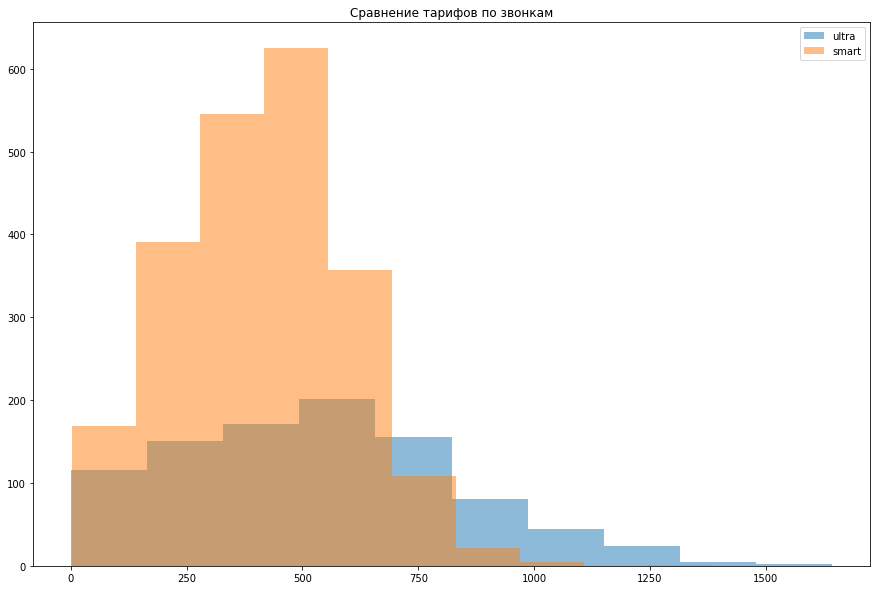

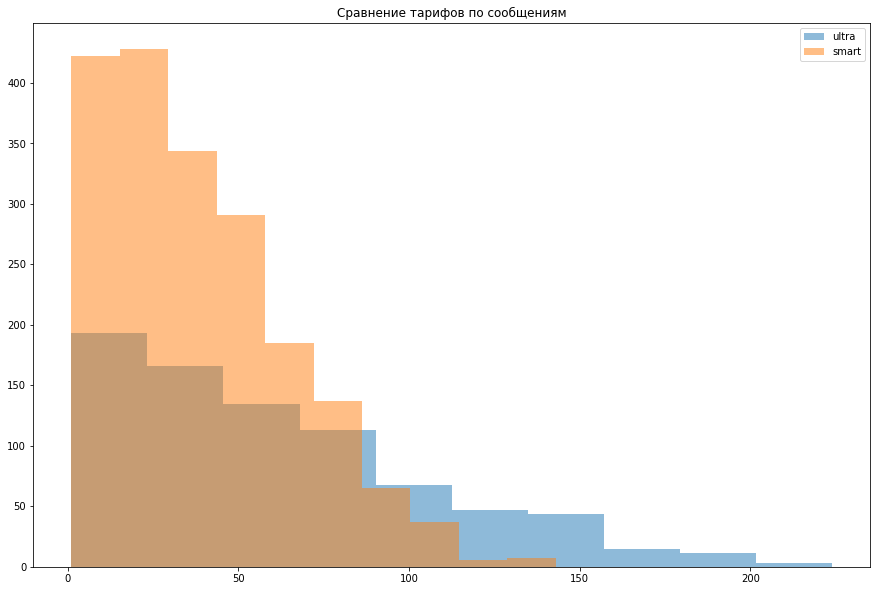

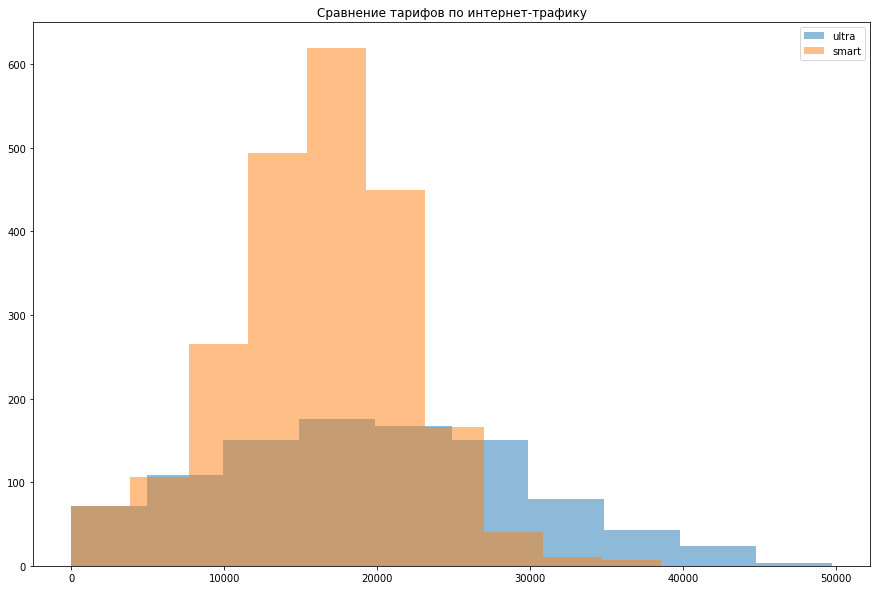

In [14]:
#Построим гистограммы для каждого измерения


#Вопрос, гистограмму надо строить по каким именно данным? Нет понимания, что мы хотим на них увидеть или сравнить зависимость
#Создадим объединенную гистограмму по звонкам
ultra_calls = user_calls_count.loc[user_calls_count['tariff_name']=='ultra']
smart_calls = user_calls_count.loc[user_calls_count['tariff_name']=='smart']
plt.figure(figsize = (15,10))
plt.title('Сравнение тарифов по звонкам')
plt.hist((ultra_calls)['minutes_spent'], alpha=0.5, label ='ultra')
plt.hist((smart_calls)['minutes_spent'], alpha=0.5, label = 'smart')
plt.legend(prop={'size': 10})

#Создадим объединенную гистограмму по сообщениям
ultra_message = user_message_count.loc[user_message_count['tariff_name']=='ultra']
smart_message = user_message_count.loc[user_message_count['tariff_name']=='smart']
plt.figure(figsize = (15,10))
plt.title('Сравнение тарифов по сообщениям')
plt.hist((ultra_message)['message_spent'], alpha=0.5, label ='ultra')
plt.hist((smart_message)['message_spent'], alpha=0.5, label = 'smart')
plt.legend(prop={'size': 10})

#Создадим объединенную гистограмму по интернет-трафику
ultra_internet = user_internet_count.loc[user_internet_count['tariff_name']=='ultra']
smart_internet = user_internet_count.loc[user_internet_count['tariff_name']=='smart']
plt.figure(figsize = (15,10))
plt.title('Сравнение тарифов по интернет-трафику')
plt.hist((ultra_internet)['used_internet_mb'], alpha=0.5, label ='ultra')
plt.hist((smart_internet)['used_internet_mb'], alpha=0.5, label = 'smart')
plt.legend(prop={'size': 10})


## Шаг 4. Проверьте гипотезы

Сформулируем нулевую гипотезу:
Средняя выручка тарифов smart и ultra равны.

Альтернативная гипотеза:
Средняя выручка тарифов smart и ultra не равны.

In [15]:
from scipy import stats as st
#Создадим две таблицы с выручками по тарифам smart и ultra
ultra_value = user_pay_in_month.loc[user_pay_in_month['tariff_name']=='ultra']
smart_value = user_pay_in_month.loc[user_pay_in_month['tariff_name']=='smart']

alpha = .05 #стандартное значение

results_tariff = st.ttest_ind(
    ultra_value['total_fee'],
    smart_value['total_fee'])
print('p-значение: ', results_tariff.pvalue) 

if (results_tariff.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.1077503123989507e-05
Отвергаем нулевую гипотезу


Сформулируем нулевую гипотезу:
Средняя выручка жителей Москвы и жителей остальных городов равны.

Альтернативная гипотеза:
Средняя выручка жителей Москвы и жителей остальных городов не равны.

In [16]:
#Создадим две таблицы с выручками по городам
moscow_value = user_pay_in_month.loc[user_pay_in_month['city']=='Москва']
other_value = user_pay_in_month.loc[user_pay_in_month['city']!='Москва']

alpha = .05 #стандартное значение

results_city = st.ttest_ind(
    moscow_value['total_fee'],
    other_value['total_fee'])
print('p-значение: ', results_city.pvalue) 

if (results_city.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6542807811464313
Не получилось отвергнуть нулевую гипотезу


## Шаг 5. Напишите общий вывод

1. Среднее кол-во минут используемое пользователями тарифа ultra выше, чем у пользователей тарифа smart, 534 против 412.
2. Среднее кол-во смс используемое пользователями тарифа ultra выше, чем у пользователей тарифа smart, 61 против 38.
3. Среднее кол-во интернет-трафика используемое пользователями тарифа smart выше, чем у пользователлей тарифа ultra, 50 против 38.
4. Пиковое значение гистограм у пользователей каждого тарифа разное, кроме пакета смс, можно сделать вывод, из это следует что пользователи тарифа ultra больще разговаривают по телефону, но реже используют интернет.
5. Нулевая гипотеза, была отвергнуты, тк средняя выручка тарифа ultra выше, чем тарифа smart. 
6. Вторую нулевую гипотезу отвегнуть не получилось, тк средняя выручка по Москве ниже, чем по остальным городам. 
7. Из этого следует, что пользователи тарифа ultra и пользователи проживающие не в Москве приносят больше прибыли.